# Machine Learning and Causal Inference – Problem Set 2

## Example from Instructions

In [1]:
setwd('/Users/mathiasschindler/Library/Mobile Documents/com~apple~CloudDocs/BSE/_T2--Causal Inf/-PSETs/PSET2')

In [2]:
library(data.table)
library(magrittr)
library(ggplot2)
library(yaml)
library(pROC)
library(glue)

Type 'citation("pROC")' for a citation.


Vedhæfter pakke: ‘pROC’


De følgende objekter er maskerede fra ‘package:stats’:

    cov, smooth, var




In [3]:
confounders <- read_yaml('cofounders.yml')
confounders

[1] "age"      "sex"      "race"     "edu"      "income"   "ninsclas"
 [7] "cat1"     "das2d3pc" "dnr1"     "ca"       "surv2md1" "aps1"    
[13] "scoma1"   "wtkilo1"  "temp1"    "meanbp1"  "resp1"    "hrt1"    
[19] "pafi1"    "paco21"   "ph1"      "wblc1"    "hema1"    "sod1"    
[25] "pot1"     "crea1"    "bili1"    "alb1"     "resp"     "card"    
[31] "neuro"    "gastr"    "renal"    "meta"     "hema"     "seps"    
[37] "trauma"   "ortho"    "cardiohx" "chfhx"    "dementhx" "psychhx" 
[43] "chrpulhx" "renalhx"  "liverhx"  "gibledhx" "malighx"  "immunhx" 
[49] "transhx"  "amihx"

In [4]:
rhc <- fread('rhc.csv') %>%
.[, swang1 := as.factor(ifelse(swang1=='RHC', 1, 0))]

In [5]:
confounders %>%
  paste(collapse=" + ") %>%
  paste("swang1", ., sep=" ~ ") ->
  formula_
ps_model <- glm(formula = formula_, family  = "binomial", data = rhc)
ps_scores <- predict(ps_model, data=rhc, type = "response")
auc_res <- auc(roc(rhc[, swang1], ps_scores))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



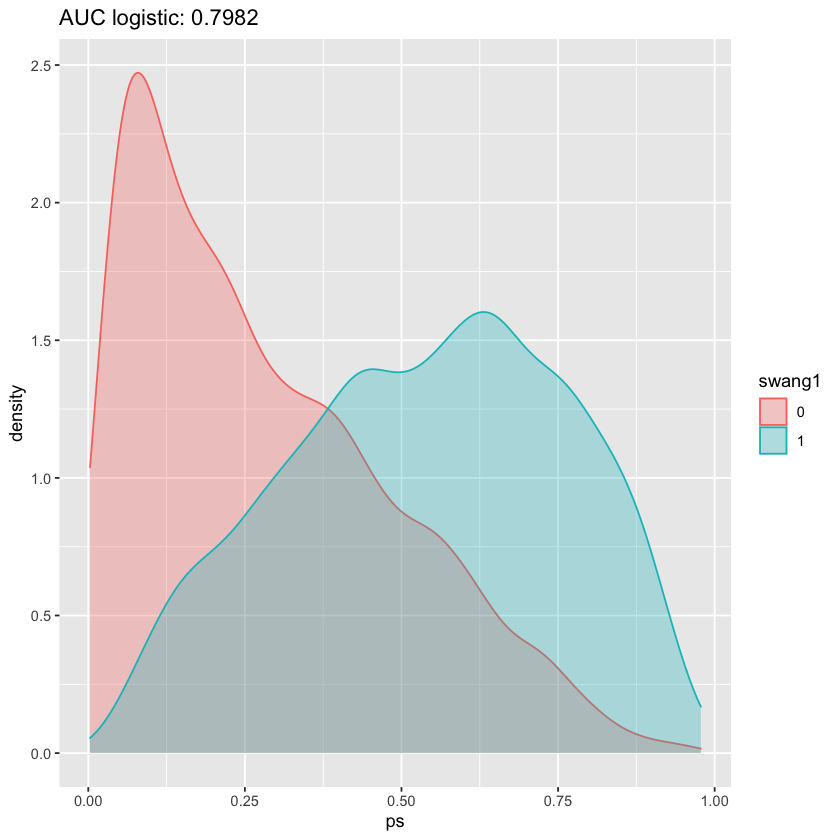

In [6]:
data.table(
  ps = ps_scores,
  swang1 = rhc[, swang1]
) %>%
  ggplot(aes(ps, group=swang1, fill=swang1, color=swang1)) +
  geom_density(alpha=0.3) +
  ggtitle("AUC logistic: {auc_res %>% round(4)}" %>% glue)